In [2]:
# Load Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [1]:
# prepare multi-class classification dataset
def create_dataset():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
                        random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [5]:
# Fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu',
    kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    # compile model
    opt = SGD(learning_rate = 0.01, momentum = 0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

layers 1 and accuracy 0.9980000257492065
layers 2 and accuracy 1.0
layers 3 and accuracy 0.949999988079071
layers 4 and accuracy 0.878000020980835
layers 5 and accuracy 0.7879999876022339


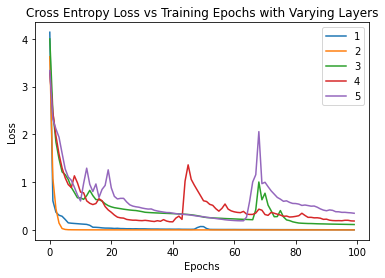

In [7]:
# Prepare dataset
trainX, trainy, testX, testy = create_dataset()

num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    # summarize final test set accuracy
    print('layers {} and accuracy {}'.format(n_layers, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_layers))

# show the plot
pyplot.title("Cross Entropy Loss vs Training Epochs with Varying Layers")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()
# layers 1 and accuracy 0.9980000257492065
# layers 2 and accuracy 1.0
# layers 3 and accuracy 0.949999988079071
# layers 4 and accuracy 0.878000020980835
# layers 5 and accuracy 0.7879999876022339

In [8]:
!jupyter nbconvert --to script multiclass_classification_layers_loss_epochs_accuracy_tensorflow_keras.ipynb

[NbConvertApp] Converting notebook multiclass_classification_layers_loss_epochs_accuracy_tensorflow_keras.ipynb to script
[NbConvertApp] Writing 2717 bytes to multiclass_classification_layers_loss_epochs_accuracy_tensorflow_keras.py
